In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
df = pd.read_csv("shopping_trends.csv", delimiter=",", low_memory=False)

df = df[['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 
         'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 
         'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 
         'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']]

missing_before = df.isnull().sum()
total_missing_before = missing_before.sum()
print("Количество пустых значений до очистки по столбцам:")
print(missing_before)
print(f"\nВсего пустых значений до очистки: {total_missing_before}")

rows_before = df.shape[0]

df = df.dropna()

rows_after = df.shape[0]

missing_after = df.isnull().sum()
total_missing_after = missing_after.sum()

print("\nКоличество пустых значений после очистки по столбцам:")
print(missing_after)
print(f"\nВсего пустых значений после очистки: {total_missing_after}")
print(f"\nУдалено строк: {rows_before - rows_after}")
print(f"Количество строк после очистки: {rows_after}")
print(f"Доля удалённых строк: {((rows_before - rows_after) / rows_before) * 100:.2f}%")

Количество пустых значений до очистки по столбцам:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Всего пустых значений до очистки: 0

Количество пустых значений после очистки по столбцам:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Seas

In [21]:
# Первые 5 строк датасета
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [20]:
# Размер датасета - 3000 строк, 19 колонок
df.shape

(3900, 19)

In [ ]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 3900


In [19]:
# Список колонок
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [18]:
# Список колонок с типами данных
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [17]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Customer ID - 0
Age - 0
Gender - 0
Item Purchased - 0
Category - 0
Purchase Amount (USD) - 0
Location - 0
Size - 0
Color - 0
Season - 0
Review Rating - 0
Subscription Status - 0
Payment Method - 0
Shipping Type - 0
Discount Applied - 0
Promo Code Used - 0
Previous Purchases - 0
Preferred Payment Method - 0
Frequency of Purchases - 0


In [16]:
# Основные статистические характеристки набора данных
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [15]:
# Определим уникальные значения для целевого признака
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

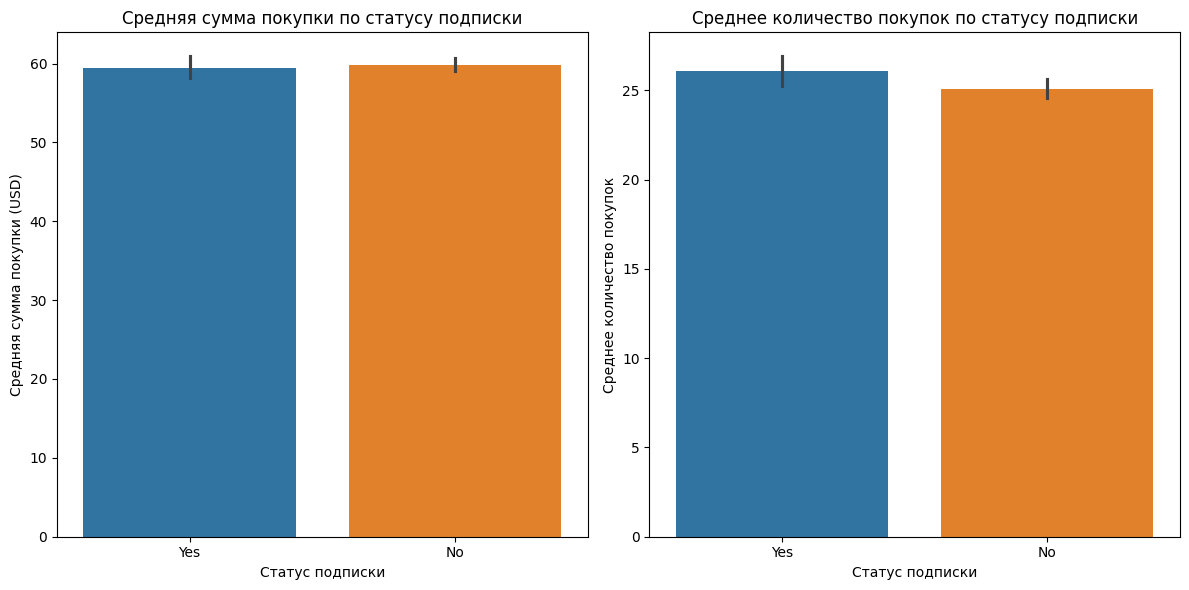

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Subscription Status', y='Purchase Amount (USD)', estimator='mean', hue='Subscription Status')
plt.title('Средняя сумма покупки по статусу подписки')
plt.xlabel('Статус подписки')
plt.ylabel('Средняя сумма покупки (USD)')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Subscription Status', y='Previous Purchases', estimator='mean', hue='Subscription Status')
plt.title('Среднее количество покупок по статусу подписки')
plt.xlabel('Статус подписки')
plt.ylabel('Среднее количество покупок')
plt.tight_layout()
plt.show()

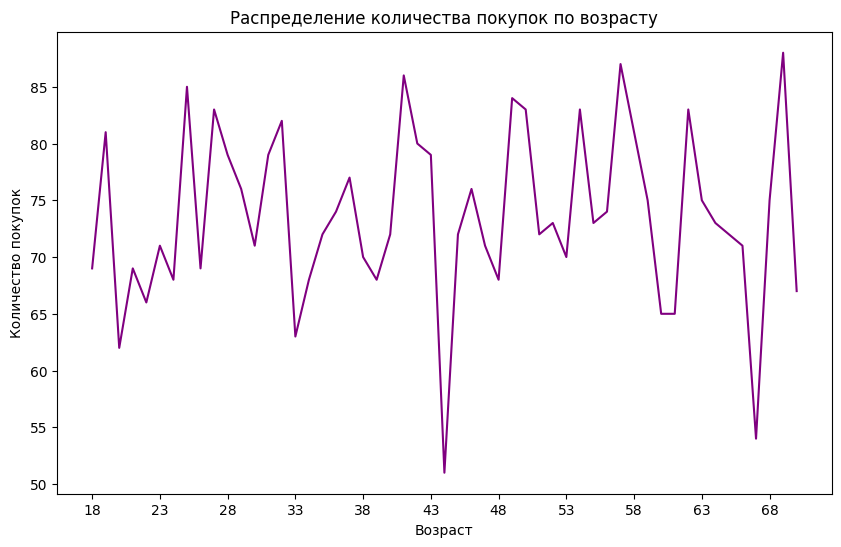

In [30]:
plt.figure(figsize=(10, 6))
age_purchase_counts = df.groupby('Age').size().reset_index(name='Purchase Count')
sns.lineplot(data=age_purchase_counts, x='Age', y='Purchase Count', color='purple')
plt.title('Распределение количества покупок по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество покупок')
plt.xticks(ticks=range(age_purchase_counts['Age'].min(), age_purchase_counts['Age'].max() + 1, 5))
plt.show()

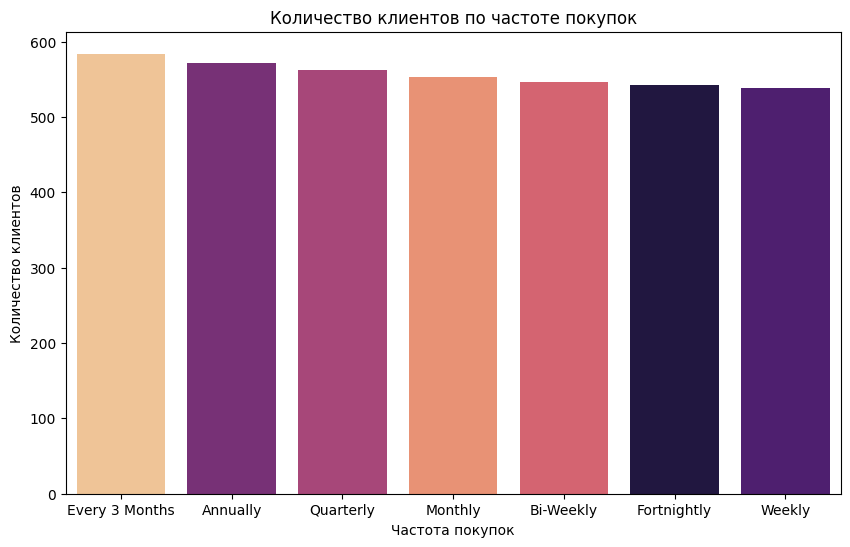

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency of Purchases', order=df['Frequency of Purchases'].value_counts().index, palette='magma', hue="Frequency of Purchases")
plt.title('Количество клиентов по частоте покупок')
plt.xlabel('Частота покупок')
plt.ylabel('Количество клиентов')
plt.show()

/var/folders/z5/9dqz3dsx3_77rhm8gwcdx1fw0000gn/T/ipykernel_86395/1774267171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='coolwarm')


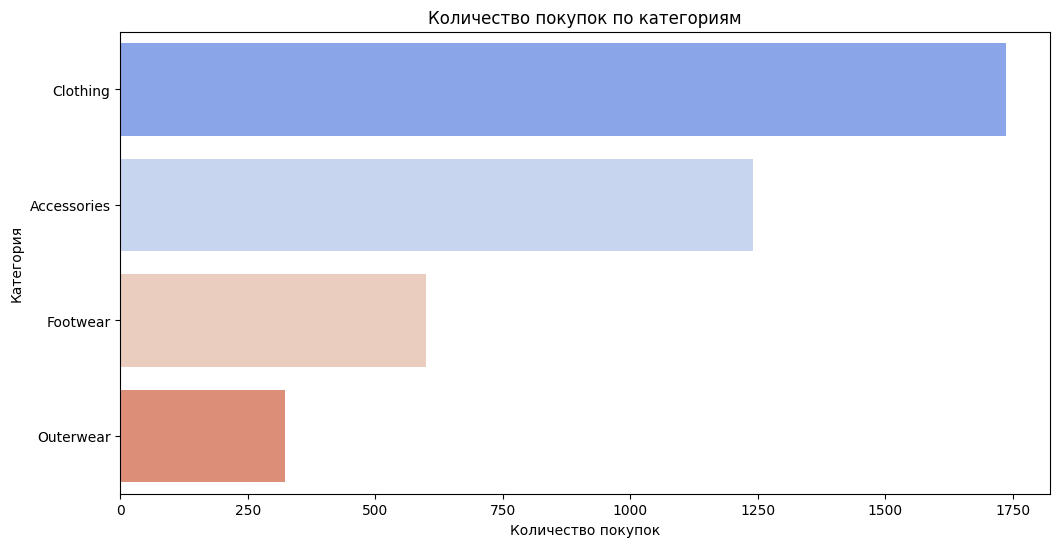

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='coolwarm')
plt.title('Количество покупок по категориям')
plt.xlabel('Количество покупок')
plt.ylabel('Категория')
plt.show()

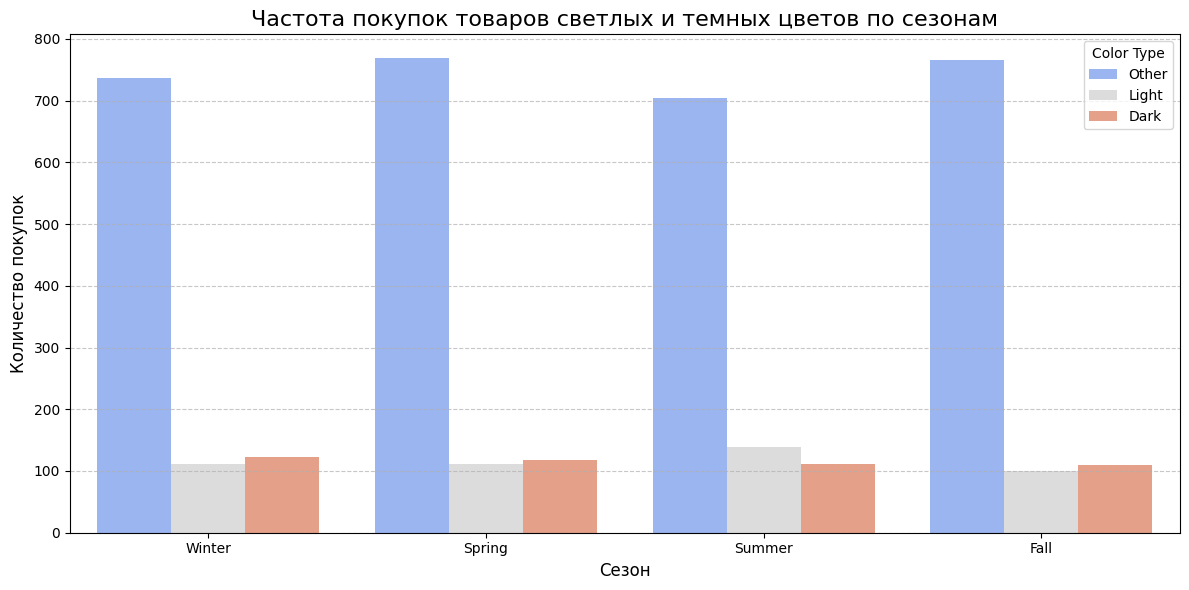

In [18]:
light_colors = ['White', 'Silver', 'Beige', 'Light Yellow', 'Light Pink', 'Light Blue', 'Light Green', 'Ivory']
dark_colors = ['Black', 'Dark Blue', 'Charcoal', 'Dark Gray', 'Brown', 'Navy', 'Dark Green']

df['Color Type'] = df['Color'].apply(lambda x: 'Light' if x in light_colors else ('Dark' if x in dark_colors else 'Other'))
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Season', hue='Color Type', palette='coolwarm')

plt.title('Частота покупок товаров светлых и темных цветов по сезонам', fontsize=16)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

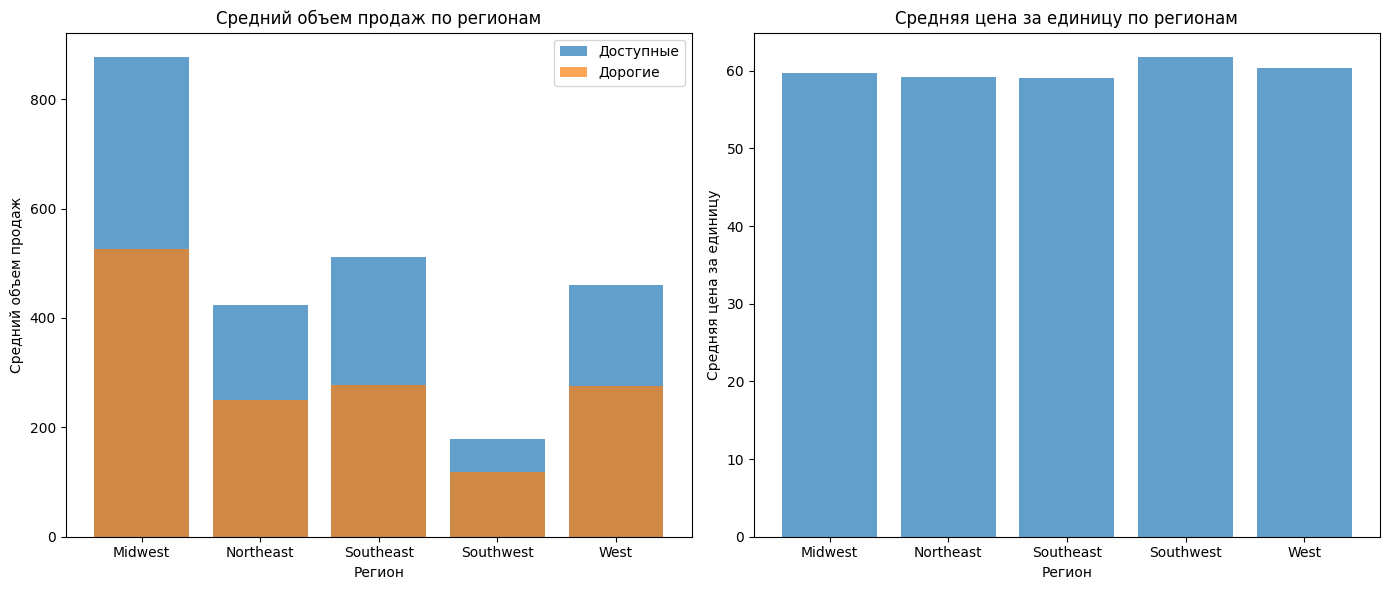

In [43]:
affordable_range = (0, 70)
pricey_threshold = 70
affordable_products = df[(df['Purchase Amount (USD)'] >= affordable_range[0]) & 
                         (df['Purchase Amount (USD)'] <= affordable_range[1])]
pricey_products = df[df['Purchase Amount (USD)'] > pricey_threshold]

df['Region'] = df['Location'].apply(lambda x: 'Northeast' if x in ['New York', 'New Jersey', 'Pennsylvania', 
                                                                   'Connecticut', 'Rhode Island', 'Massachusetts', 
                                                                   'Vermont', 'New Hampshire', 'Maine'] else 
                                    ('Southwest' if x in ['Arizona', 'New Mexico', 'Texas', 'Oklahoma'] else
                                     ('West' if x in ['California', 'Nevada', 'Utah', 'Colorado', 'Washington', 'Oregon',
                                                       'Idaho', 'Montana', 'Wyoming'] else
                                      ('Southeast' if x in ['Florida', 'Georgia', 'South Carolina', 'North Carolina', 
                                                            'Alabama', 'Tennessee', 'Kentucky', 'Mississippi', 'Louisiana', 'Arkansas'] else
                                       'Midwest'))))
affordable_summary = affordable_products.groupby('Region').agg(
    avg_units_sold=('Purchase Amount (USD)', 'count'),
    avg_price_per_unit=('Purchase Amount (USD)', 'mean')
).reset_index()
premium_summary = pricey_products.groupby('Region').agg(
    avg_units_sold=('Purchase Amount (USD)', 'count'),
    avg_price_per_unit=('Purchase Amount (USD)', 'mean')
).reset_index()
merged_summary = pd.merge(affordable_summary, premium_summary, on='Region', 
                          suffixes=('_affordable', '_premium'))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(merged_summary['Region'], merged_summary['avg_units_sold_affordable'], label='Доступные', alpha=0.7)
axes[0].bar(merged_summary['Region'], merged_summary['avg_units_sold_premium'], label='Дорогие', alpha=0.7)
axes[0].set_title('Средний объем продаж по регионам')
axes[0].set_xlabel('Регион')
axes[0].set_ylabel('Средний объем продаж')
axes[0].legend()

summary = df.groupby('Region').agg(
    avg_units_sold=('Purchase Amount (USD)', 'count'),
    avg_price_per_unit=('Purchase Amount (USD)', 'mean')
).reset_index()
axes[1].bar(summary['Region'], summary['avg_price_per_unit'], alpha=0.7)
axes[1].set_title('Средняя цена за единицу по регионам')
axes[1].set_xlabel('Регион')
axes[1].set_ylabel('Средняя цена за единицу')
plt.tight_layout()
plt.show()

/var/folders/z5/9dqz3dsx3_77rhm8gwcdx1fw0000gn/T/ipykernel_38802/3282199620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipping Type', y='Review Rating', data=df, palette='Set2')


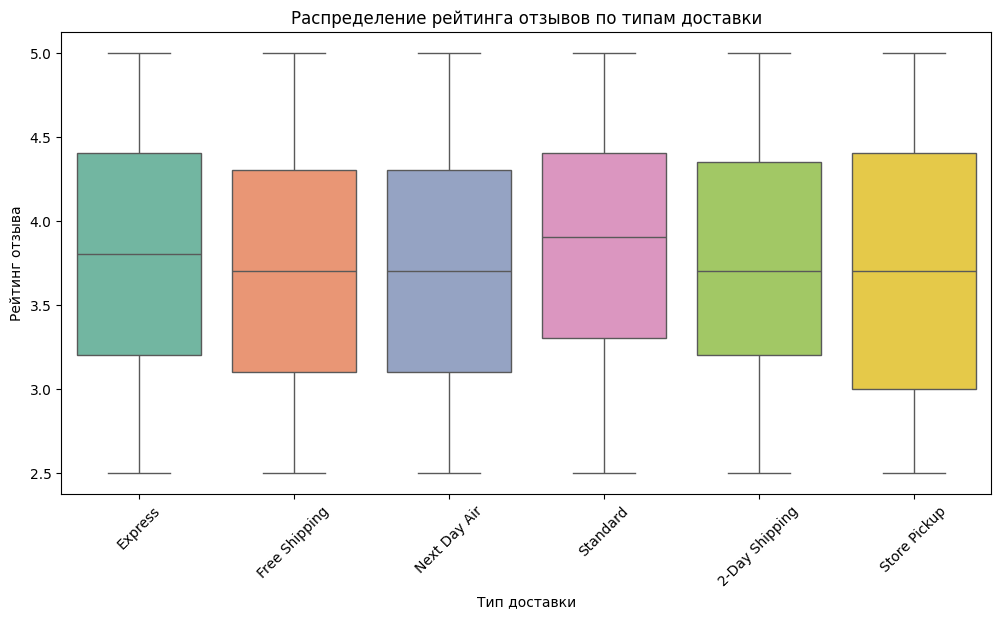

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipping Type', y='Review Rating', data=df, palette='Set2')
plt.title("Распределение рейтинга отзывов по типам доставки")
plt.xlabel("Тип доставки")
plt.ylabel("Рейтинг отзыва")
plt.xticks(rotation=45)
plt.show()

0    26
1    26
2    52
3    52
4     1
Name: Frequency of Purchases, dtype: int64


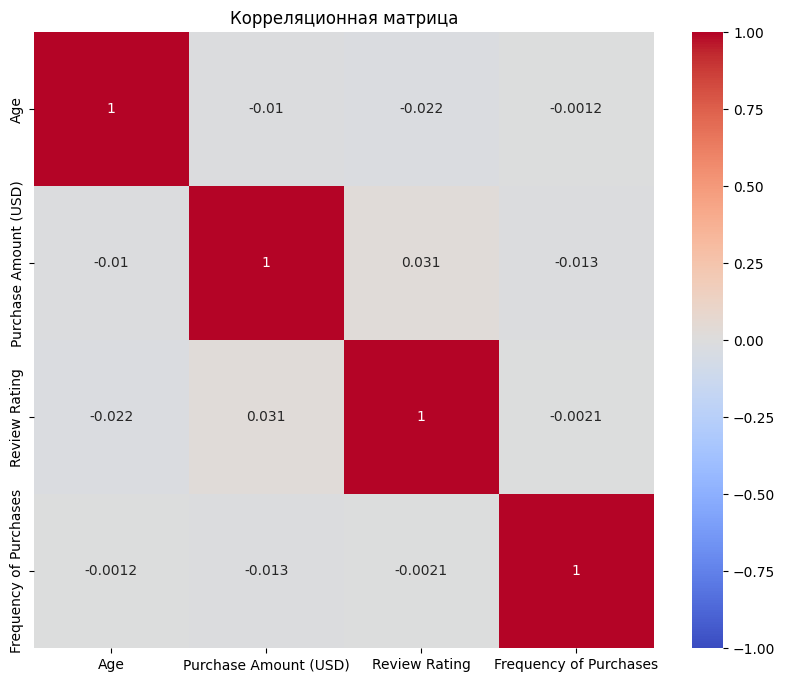

In [ ]:
frequency_map = {
    'Annually': 1,
    'Every 3 Months': 4,
    'Quarterly': 4,
    'Monthly': 12,
    'Bi-Weekly': 26,
    'Fortnightly': 26,
    'Weekly': 52
}

df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_map)
print(df['Frequency of Purchases'].head())
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Frequency of Purchases']
numeric_data = df[numeric_cols]

correlation_matrix = numeric_data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()